In [1]:
'''pip install feature_engine imbalanced_learn'''

'pip install feature_engine imbalanced_learn'

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
'''pip install -U imbalanced-learn'''

'pip install -U imbalanced-learn'

In [4]:
'''pip install xgboost'''

'pip install xgboost'

In [5]:
'''pip install ipyparallel'''

'pip install ipyparallel'

# Importing the necessary Python Packages

In [6]:
import math
import operator
import numpy as NumPy
import warnings
import pandas as Pandas
import matplotlib.pyplot as PyPlot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as SeaBorn
from matplotlib import gridspec
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from feature_engine.encoding import WoEEncoder, RareLabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek

from sklearn import metrics
import webbrowser

In [7]:
column_dtypes = {
    'cc_num':'object',
    'zip': 'object'
}
Pandas.set_option('display.max_columns', None)

In [8]:
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))

False


In [9]:
path = 'DataSet/fraudtrain.csv'
DataFeed = Pandas.read_csv(path, index_col=0, dtype=column_dtypes, parse_dates=['trans_date_trans_time', 'dob'])

## Showcasing Basic information such as column name and datatype, of the dataset used in the project

In [10]:
DataFeed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  object        
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  object        
 12  lat                    12966

## Adding Column names into a variable for using in fututre for data encoding ( converting data from string to integear form)

In [11]:
columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'lat', 'long', 'job', 'dob','merch_lat', 'merch_long', 'is_fraud']

# Show casing first five data entries as a sample of the dataset used

In [12]:
DataFeed.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Adding Age Column in the data by take difference of year of birth from present year

In [13]:
DataFeed['age'] = NumPy.rint((Pandas.to_datetime('now') - DataFeed['dob']) / NumPy.timedelta64(1, 'Y'))

# Show casing first five data entries as a sample of the dataset used post addition of age column in it

In [14]:
DataFeed.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36.0


# Seaborn Pairplot of The Data

In [15]:
'''SeaBorn.pairplot(DataFeed)'''

'SeaBorn.pairplot(DataFeed)'

# Data Preprocessing

In [16]:
def IsDataFieldMissing():
    print(DataFeed.isnull().sum())
    print(DataFeed.isnull().values.any())
    

In [17]:
IsDataFieldMissing()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
dtype: int64
False


# Graphical Representation of Where how many authenticate and fraud transaction in various categories

<AxesSubplot:title={'center':'Number of frauds by categories'}, xlabel='category', ylabel='cc_num'>

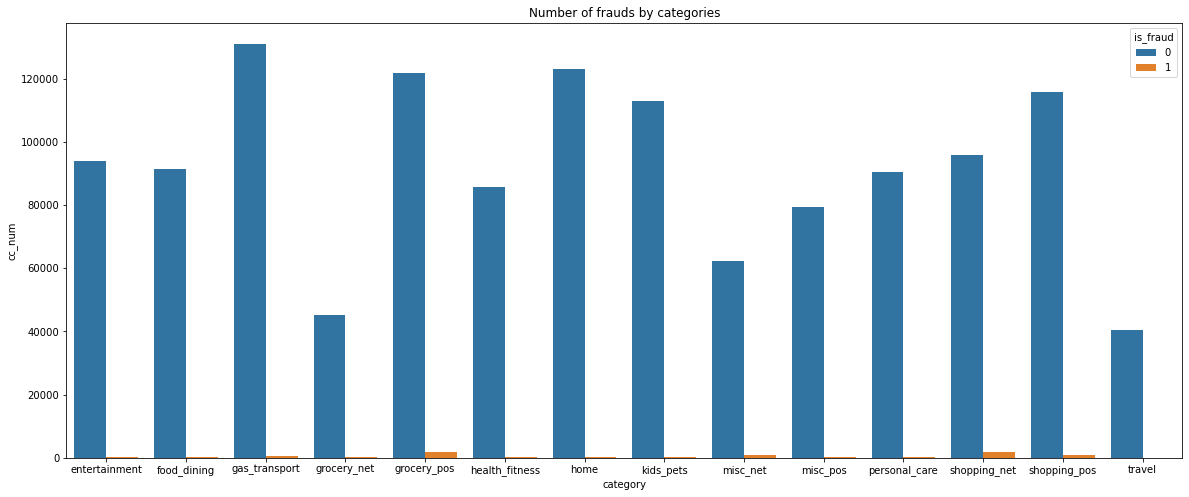

In [18]:
PyPlot.figure(figsize=(20,8))
PyPlot.title('Number of frauds by categories')
SeaBorn.barplot(x="category", y='cc_num' ,hue="is_fraud", data=DataFeed.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())

# Graphical Bifaction of Data on the bases of being fraud transaction or authenticate to the avg amount spent on that transaction

<AxesSubplot:title={'center':'Number of frauds by the average amount of money spent'}, xlabel='is_fraud', ylabel='amt'>

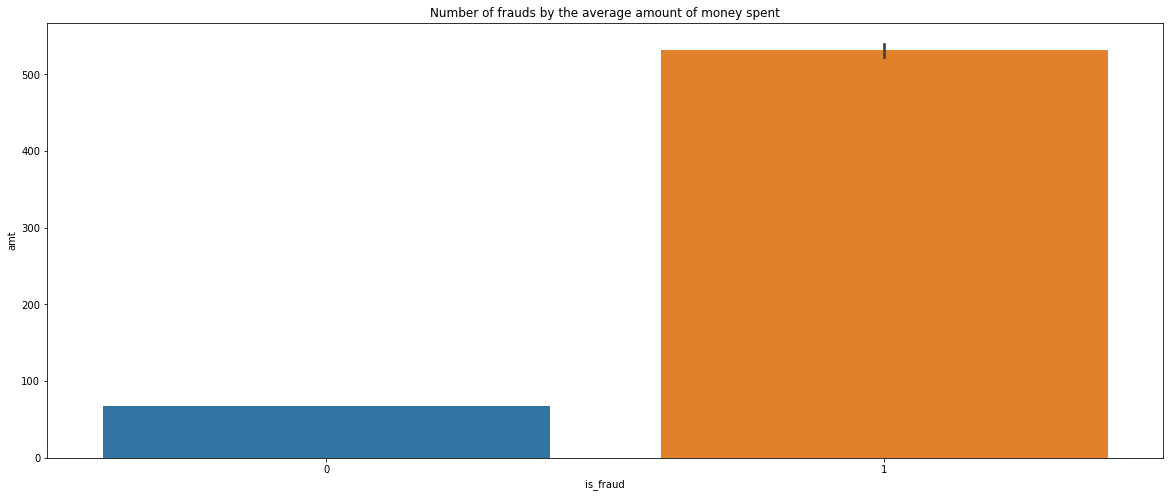

In [19]:
PyPlot.figure(figsize=(20,8))
PyPlot.title('Number of frauds by the average amount of money spent')
SeaBorn.barplot(x="is_fraud", y='amt', data=DataFeed)

# Describing the Features of the dataset which are gonna be used in the training of our deep learning and machine learning algorithms and making train variable 

In [20]:
ColumnFeatures = ['category', 'amt', 'gender', 'lat', 'long', 'job', 'age','merch_lat', 'merch_long', 'is_fraud']
X = DataFeed.copy()[ColumnFeatures]
y = X.pop('is_fraud')

# Counting number of records in our dataset  By Number Of Being Fraud And Authenticatic

In [21]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

# Data Encoding Functions And Libraries for Encoding The Data 

In [22]:
RareEncoder = RareLabelEncoder(tol=0.005, n_categories=1, variables=['category', 'gender','job'])
EncodedData = RareEncoder.fit_transform(X)
woe_encoder = WoEEncoder(variables=['category', 'gender','job'])
woe_encoder.fit(EncodedData , y)
def TransFormData(X):
    EncodedData = RareEncoder.transform(X)
    return woe_encoder.transform(EncodedData)

# Example Of How Data Is Gonna Be Encoded

In [23]:
woe_encoder.encoder_dict_

{'category': {'entertainment': -0.8516286992560543,
  'food_dining': -1.2586853497760662,
  'gas_transport': -0.21072666983832336,
  'grocery_net': -0.6775693805711962,
  'grocery_pos': 0.8984981511385185,
  'health_fitness': -1.3227451854687005,
  'home': -1.2849471761148556,
  'kids_pets': -1.0108222014735257,
  'misc_net': 0.9241027325901408,
  'misc_pos': -0.6148052966631049,
  'personal_care': -0.8738469816900943,
  'shopping_net': 1.1217208340057077,
  'shopping_pos': 0.2231471164740934,
  'travel': -0.7067216727288238},
 'gender': {'F': -0.0959983025717894, 'M': 0.1051331115173589},
 'job': {'Agricultural consultant': -0.3930992956626496,
  'Chartered public finance accountant': -0.6897345182410528,
  'Chief Executive Officer': -0.32650034347284274,
  'Comptroller': -0.5739632665653881,
  'Copywriter, advertising': 0.08472199460762161,
  'Designer, ceramics/pottery': -1.3825164909327965,
  'Environmental consultant': -0.6888932332393649,
  'Exhibition designer': -0.0434145193989

# Passing Our Train Data To Make It Encoded

In [24]:
TransFormData(X)

,category,amt,gender,lat,long,job,age,merch_lat,merch_long
0,0.924103,4.97,-0.095998,36.0788,-81.1781,0.032767,34.0,36.011293,-82.048315
1,0.898498,107.23,-0.095998,48.8878,-118.2105,0.032767,44.0,49.159047,-118.186462
2,-0.851629,220.11,0.105133,42.1808,-112.2620,0.032767,60.0,43.150704,-112.154481
3,-0.210727,45.00,0.105133,46.2306,-112.1138,0.032767,55.0,47.034331,-112.561071
4,-0.614805,41.96,0.105133,38.4207,-79.4629,0.032767,36.0,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...
1296670,-0.851629,15.56,0.105133,37.7175,-112.4777,0.032767,60.0,36.841266,-111.690765
1296671,-1.258685,51.70,0.105133,39.2667,-77.5101,0.032767,42.0,38.906881,-78.246528
1296672,-1.258685,105.93,0.105133,32.9396,-105.8189,0.053227,55.0,33.619513,-105.130529
1296673,-1.258685,74.90,0.105133,43.3526,-102.5411,0.032767,42.0,42.788940,-103.241160


# Because there are not many records labeled 1, I will undersample to balance the data and reduce training time


In [25]:
RandomSampler = RandomUnderSampler(random_state=42)

# Taking Data For Testing 

In [26]:
TestPath = 'DataSet/fraudTest.csv'
DataFeed_test = Pandas.read_csv(TestPath, index_col=0, dtype=column_dtypes, parse_dates=['trans_date_trans_time', 'dob'])
DataFeed_test['age'] = NumPy.rint((Pandas.to_datetime('now') - DataFeed['dob']) / NumPy.timedelta64(1, 'Y'))

# Data For Testing Data

In [27]:
TestData = DataFeed_test.copy()[ColumnFeatures]
y_test = TestData.pop('is_fraud')
TestData = TransFormData(TestData)

# Balancing Train And Test Data To Reduce Training And Testing Of Models By A Great Extent

In [28]:
TrainDataSetUnderSampling, Y_Train_DataUnderSampling = RandomSampler.fit_resample(TransFormData(X), y)
TestDataFinalUnderSampling, Y_Test_DataUnderSampling = RandomSampler.fit_resample(TestData, y_test)

# SMOTE: - Oversampling

In [29]:
oversampler= SMOTE(random_state=42)
TrainDataSetSmote, Y_Train_DataSmote = oversampler.fit_resample(TransFormData(X), y)
TestDataFinalSmote, Y_Test_DataSmote = oversampler.fit_resample(TestData, y_test)

## Hybrid Sampling Methods

## SMOTE TOMEK 

In [30]:
SmoteTomek = SMOTETomek()
TrainDataSetSmoteTomek, Y_Train_DataSmoteTomek = SmoteTomek.fit_resample(TransFormData(X), y)
TestDataFinalTomek, Y_Test_DataSmoteTomek = SmoteTomek.fit_resample(TestData, y_test)

In [31]:
def PlotConfusionMatrix(y_test, y_pred):
    display_labels = ['Genuine', 'Fraudulent']
    ConfusionMatrix = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix,display_labels=display_labels)
    disp = disp.plot(cmap='BuGn', xticks_rotation=30)
    PyPlot.show()

# Variables For Storing And Exporting Results Of Data

In [32]:
ClassificationReport=[]
AccuracyScoreList=[]
PrecisionScoreList=[]
F1ScoreList=[]
RecallScoreList=[]
SenstivityList=[]
SpecificityList=[]


# Training Of Various Supervised Machine Learning And Deep Learning Algorithm


# 1. Random Forest Tree Algorithm

In [33]:
def RandomForestFunction(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    parameters = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}
    RandomForestModel = RandomForestClassifier()
    Classifier = GridSearchCV(RandomForestModel, parameters,scoring='accuracy',cv=5)
    Classifier.fit(TrainDataSet, Y_Train_Data)
    ModelPrediction = Classifier.predict(TestDataFinal)
    print('Classification Report of Random Forest Tree Algorithm')
    print(classification_report(Y_Test_Data, ModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, ModelPrediction))
    print('\n\nAccuracy score of the Random Forest Tree model is = ',accuracy_score(Y_Test_Data, ModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, ModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, ModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, ModelPrediction))
    print('\n\nConfusion Matrix Of Random Forest Tree Model')
    PlotConfusionMatrix(Y_Test_Data,ModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, ModelPrediction, average='macro'))
    ConfusionMatrix = confusion_matrix(Y_Test_Data,ModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    
    #ROC Curve 
    ModelPrediction_Probability = Classifier.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("ROC Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Random Forest Tree Algorithm
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2145
           1       0.96      0.91      0.94      2145

    accuracy                           0.94      4290
   macro avg       0.94      0.94      0.94      4290
weighted avg       0.94      0.94      0.94      4290



Accuracy score of the Random Forest Tree model is =  0.9377622377622378


Confusion Matrix Of Random Forest Tree Model


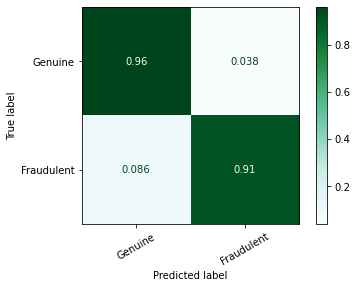

Sensitivity Of This Model Is :  0.9617715617715618
Specificity Of This Model Is : :  0.9137529137529138


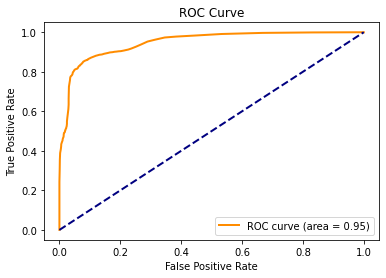

In [34]:
RandomForestFunction(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

In [35]:
'''RandomForestFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)'''

'RandomForestFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)'

In [36]:
'''RandomForestFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalSmoteTomek,Y_Test_DataSmoteTomek)'''

'RandomForestFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalSmoteTomek,Y_Test_DataSmoteTomek)'

# 2. Sample Vector Machine Algorithm

In [37]:
def SampleVectorModelFunction(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    SampleVectorMachineModel = SVC(probability=True)
    SampleVectorMachineModel.fit(TrainDataSet, Y_Train_Data)
    SampleVectorMachineModelPrediction = SampleVectorMachineModel.predict(TestDataFinal)
    print('Classification Report of Sample Vector Machine Algorithm')
    print(classification_report(Y_Test_Data, SampleVectorMachineModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, SampleVectorMachineModelPrediction))
    print('\n\nAccuracy score of the Sample Vector Machine model is = ',accuracy_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, SampleVectorMachineModelPrediction))
    print('\n\nConfusion Matrix Of Sample Vector Machine Model')
    PlotConfusionMatrix(Y_Test_Data,SampleVectorMachineModelPrediction)
    
    RecallScoreList.append(recall_score(Y_Test_Data,SampleVectorMachineModelPrediction, average='macro'))
    ConfusionMatrix = confusion_matrix(Y_Test_Data,SampleVectorMachineModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve 
    ModelPredictioNumPyrobability = SampleVectorMachineModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPredictioNumPyrobability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Sample Vector Machine Algorithm
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2145
           1       0.96      0.75      0.84      2145

    accuracy                           0.86      4290
   macro avg       0.88      0.86      0.86      4290
weighted avg       0.88      0.86      0.86      4290



Accuracy score of the Sample Vector Machine model is =  0.8589743589743589


Confusion Matrix Of Sample Vector Machine Model


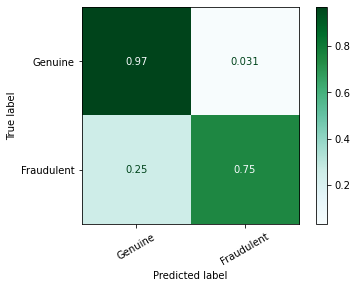

Sensitivity Of This Model Is :  0.9692307692307692
Specificity Of This Model Is : :  0.7487179487179487


C:\Users\vikash\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


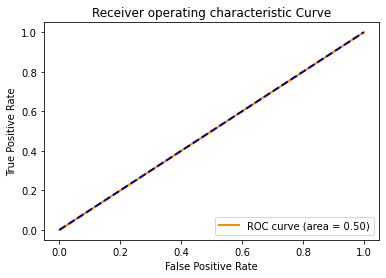

In [38]:
SampleVectorModelFunction(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

In [39]:
'''SampleVectorModelFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)'''

'SampleVectorModelFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)'

In [40]:
'''SampleVectorModelFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)'''

'SampleVectorModelFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)'

# 3. Decision Tree Model

In [41]:
def DecisionTreeModelFunction(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    DecisionTreeModel = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
    DecisionTreeModel.fit(TrainDataSet, Y_Train_Data)
    DecisionTreeModelPrediction = DecisionTreeModel.predict(TestDataFinal)
    print('Classification Report of Decision Tree Model ')
    print(classification_report(Y_Test_Data, DecisionTreeModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, DecisionTreeModelPrediction))
    print('\n\nAccuracy score of the Decision Tree model is = ',accuracy_score(Y_Test_Data, DecisionTreeModelPrediction))
    print('\n\nConfusion Matrix Of Decision Tree Model')
    PlotConfusionMatrix(Y_Test_Data, DecisionTreeModelPrediction)
    
    
    ConfusionMatrix = confusion_matrix(Y_Test_Data,DecisionTreeModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
  
    
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    
   
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, DecisionTreeModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, DecisionTreeModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, DecisionTreeModelPrediction))
    RecallScoreList.append(recall_score(Y_Test_Data, DecisionTreeModelPrediction, average='macro'))

    #ROC Curve For This Model
    ModelPrediction_Probability = DecisionTreeModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()


Classification Report of Decision Tree Model 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2145
           1       0.98      0.81      0.89      2145

    accuracy                           0.90      4290
   macro avg       0.91      0.90      0.90      4290
weighted avg       0.91      0.90      0.90      4290



Accuracy score of the Decision Tree model is =  0.8988344988344988


Confusion Matrix Of Decision Tree Model


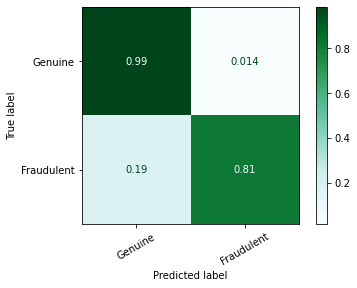

Sensitivity Of This Model Is :  0.9855477855477855
Specificity Of This Model Is : :  0.8121212121212121


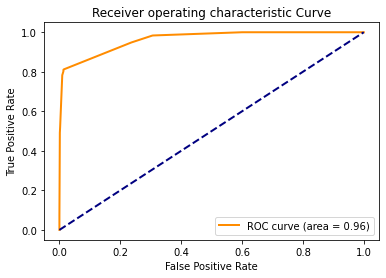

In [42]:
DecisionTreeModelFunction(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

Classification Report of Decision Tree Model 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90    553574
           1       0.87      0.94      0.90    553574

    accuracy                           0.90   1107148
   macro avg       0.90      0.90      0.90   1107148
weighted avg       0.90      0.90      0.90   1107148



Accuracy score of the Decision Tree model is =  0.9010710401861359


Confusion Matrix Of Decision Tree Model


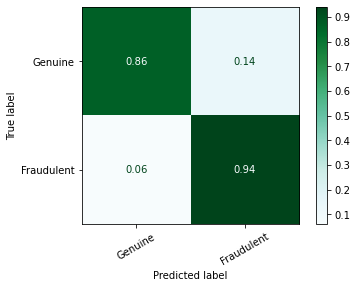

Sensitivity Of This Model Is :  0.8616932876182769
Specificity Of This Model Is : :  0.940448792753995


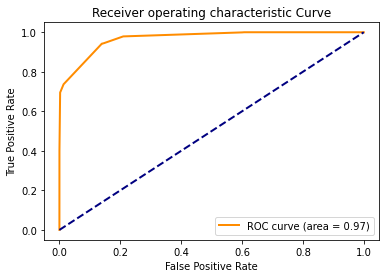

In [43]:
DecisionTreeModelFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

Classification Report of Decision Tree Model 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90    553565
           1       0.87      0.94      0.90    553565

    accuracy                           0.90   1107130
   macro avg       0.90      0.90      0.90   1107130
weighted avg       0.90      0.90      0.90   1107130



Accuracy score of the Decision Tree model is =  0.9008174288475608


Confusion Matrix Of Decision Tree Model


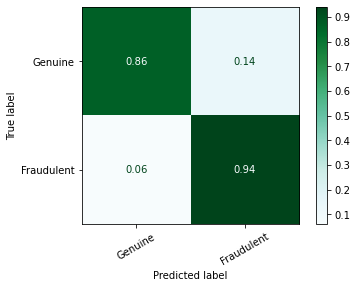

Sensitivity Of This Model Is :  0.8613785192344169
Specificity Of This Model Is : :  0.9402563384607047


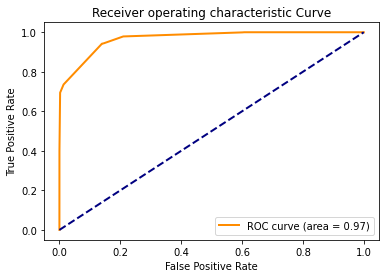

In [44]:
DecisionTreeModelFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# 4. Kth Nearest Neighbour Model

In [45]:
def KNearestNeighbourModelFunction(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    n = 5
    KNeighbourModel = KNeighborsClassifier(n_neighbors = n)
    KNeighbourModel.fit(TrainDataSet, Y_Train_Data)
    KNeighbourModelPrediction = KNeighbourModel.predict(TestDataFinal)
    print('Classification Report of Kth Nearest Neighbour Model')
    print(classification_report(Y_Test_Data, KNeighbourModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, KNeighbourModelPrediction))
    print('\n\nAccuracy score of the Kth Nearest Neighbour model is = ',accuracy_score(Y_Test_Data, KNeighbourModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, KNeighbourModelPrediction))
    PrecisionScoreList.append(precision_score(Y_Test_Data, KNeighbourModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, KNeighbourModelPrediction))
    print('\n\nConfusion Matrix Of Kth Nearest Neighbour Model')
    PlotConfusionMatrix(Y_Test_Data,KNeighbourModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, KNeighbourModelPrediction, average='macro'))

    
    ConfusionMatrix = confusion_matrix(Y_Test_Data,KNeighbourModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve
    ModelPrediction_Probability = KNeighbourModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classification Report of Kth Nearest Neighbour Model
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2145
           1       0.86      0.85      0.85      2145

    accuracy                           0.86      4290
   macro avg       0.86      0.86      0.86      4290
weighted avg       0.86      0.86      0.86      4290



Accuracy score of the Kth Nearest Neighbour model is =  0.8552447552447553


Confusion Matrix Of Kth Nearest Neighbour Model


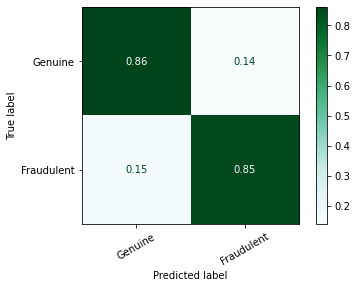

Sensitivity Of This Model Is :  0.8615384615384616
Specificity Of This Model Is : :  0.848951048951049


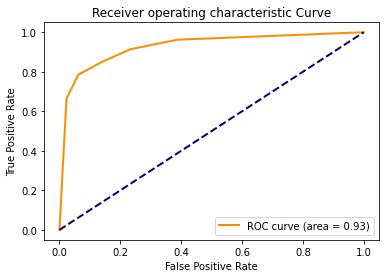

In [46]:
KNearestNeighbourModelFunction(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

Classification Report of Kth Nearest Neighbour Model
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    553574
           1       0.90      0.64      0.75    553574

    accuracy                           0.79   1107148
   macro avg       0.81      0.79      0.78   1107148
weighted avg       0.81      0.79      0.78   1107148



Accuracy score of the Kth Nearest Neighbour model is =  0.7854704158793585


Confusion Matrix Of Kth Nearest Neighbour Model


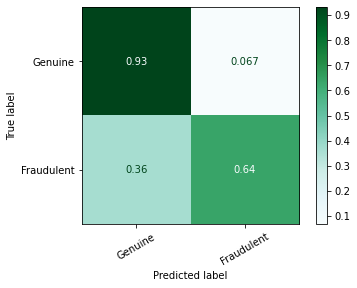

Sensitivity Of This Model Is :  0.9325004425785893
Specificity Of This Model Is : :  0.6384403891801277


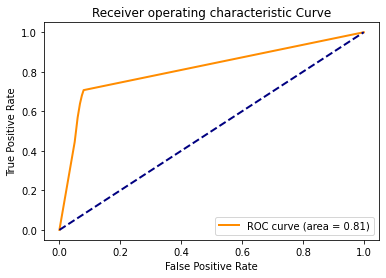

In [47]:
KNearestNeighbourModelFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

Classification Report of Kth Nearest Neighbour Model
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    553565
           1       0.90      0.64      0.75    553565

    accuracy                           0.79   1107130
   macro avg       0.81      0.79      0.78   1107130
weighted avg       0.81      0.79      0.78   1107130



Accuracy score of the Kth Nearest Neighbour model is =  0.7853151843053662


Confusion Matrix Of Kth Nearest Neighbour Model


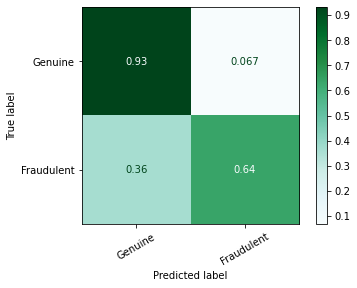

Sensitivity Of This Model Is :  0.9326203788173024
Specificity Of This Model Is : :  0.6380099897934298


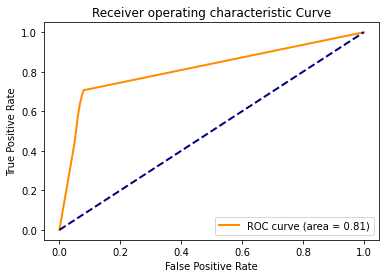

In [48]:
KNearestNeighbourModelFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# 5. Logistic Regression

In [49]:
def LogisticRegressionModelFunction(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    LogisticRegressionModel = LogisticRegression(solver='lbfgs', max_iter=10000)
    LogisticRegressionModel.fit(TrainDataSet, Y_Train_Data)
    LogisticRegressionModelPrediction = LogisticRegressionModel.predict(TestDataFinal)
    print('Classifaction Report Of Logistic Regression ')
    print(classification_report(Y_Test_Data, LogisticRegressionModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, LogisticRegressionModelPrediction))
    print('\n\nAccuracy score of the Logistic Regression model is = ',accuracy_score(Y_Test_Data, LogisticRegressionModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, LogisticRegressionModelPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, LogisticRegressionModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, LogisticRegressionModelPrediction))
    print('\n\nConfusion Matrix Of Logistic Regression Model')
    PlotConfusionMatrix(Y_Test_Data,LogisticRegressionModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, LogisticRegressionModelPrediction, average='macro'))

    ConfusionMatrix = confusion_matrix(Y_Test_Data,LogisticRegressionModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    
    
    
    #ROC Curve
    ModelPrediction_Probability = LogisticRegressionModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()

Classifaction Report Of Logistic Regression 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2145
           1       0.96      0.74      0.84      2145

    accuracy                           0.86      4290
   macro avg       0.88      0.86      0.85      4290
weighted avg       0.88      0.86      0.85      4290



Accuracy score of the Logistic Regression model is =  0.8566433566433567


Confusion Matrix Of Logistic Regression Model


C:\Users\vikash\Anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


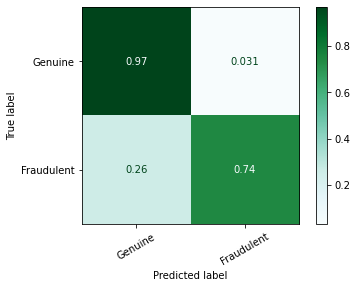

Sensitivity Of This Model Is :  0.9692307692307692
Specificity Of This Model Is : :  0.7440559440559441


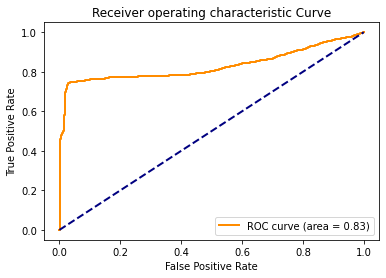

In [50]:
LogisticRegressionModelFunction(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

C:\Users\vikash\Anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifaction Report Of Logistic Regression 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87    553574
           1       0.96      0.74      0.84    553574

    accuracy                           0.85   1107148
   macro avg       0.87      0.85      0.85   1107148
weighted avg       0.87      0.85      0.85   1107148



Accuracy score of the Logistic Regression model is =  0.8539048076679902


Confusion Matrix Of Logistic Regression Model


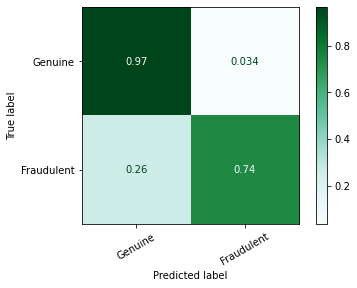

Sensitivity Of This Model Is :  0.9660749962967914
Specificity Of This Model Is : :  0.741734619039189


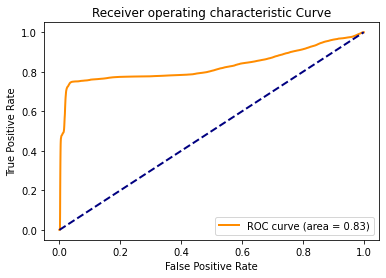

In [51]:
LogisticRegressionModelFunction(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

C:\Users\vikash\Anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifaction Report Of Logistic Regression 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87    553565
           1       0.96      0.74      0.83    553565

    accuracy                           0.85   1107130
   macro avg       0.87      0.85      0.85   1107130
weighted avg       0.87      0.85      0.85   1107130



Accuracy score of the Logistic Regression model is =  0.8532990705698518


Confusion Matrix Of Logistic Regression Model


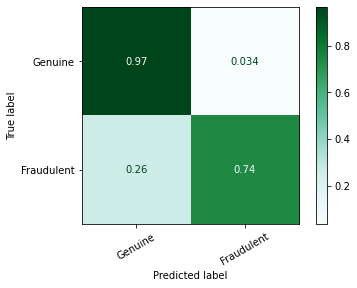

Sensitivity Of This Model Is :  0.9661485101117303
Specificity Of This Model Is : :  0.7404496310279732


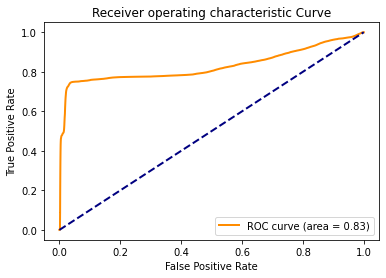

In [52]:
LogisticRegressionModelFunction(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# 6. Neural Networks

In [53]:
def NeuralNetworks(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data, Epochs):
    MLPC = MLPClassifier(hidden_layer_sizes=(50,), max_iter=5000,solver='adam',learning_rate='adaptive',n_iter_no_change=Epochs)
    MLPC.fit(TrainDataSet, Y_Train_Data)
    NeuralNetworkPrediction = MLPC.predict(TestDataFinal)
    # Obtenemos valores de recall
    recall_acc = recall_score (Y_Test_Data,NeuralNetworkPrediction)
    print('Classifaction Report Of Neural Network ')
    print(classification_report(Y_Test_Data, NeuralNetworkPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, NeuralNetworkPrediction))
    print('\n\nAccuracy score of the Neural Network model is = ',accuracy_score(Y_Test_Data, NeuralNetworkPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, NeuralNetworkPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, NeuralNetworkPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, NeuralNetworkPrediction))
    print('\n\nConfusion Matrix Of Neural Network Model')
    PlotConfusionMatrix(Y_Test_Data,NeuralNetworkPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, NeuralNetworkPrediction, average='macro'))
   
    
    

    
    ConfusionMatrix = confusion_matrix(Y_Test_Data,NeuralNetworkPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
    
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    #ROC Curve
    ModelPrediction_Probability = MLPC.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   

Classifaction Report Of Neural Network 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2145
           1       0.94      0.88      0.91      2145

    accuracy                           0.91      4290
   macro avg       0.92      0.91      0.91      4290
weighted avg       0.92      0.91      0.91      4290



Accuracy score of the Neural Network model is =  0.9132867132867133


Confusion Matrix Of Neural Network Model


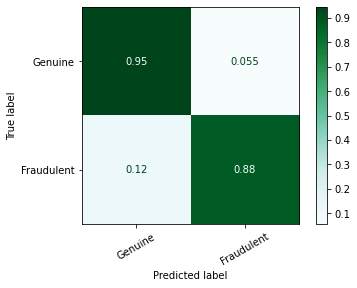

Sensitivity Of This Model Is :  0.9454545454545454
Specificity Of This Model Is : :  0.8811188811188811


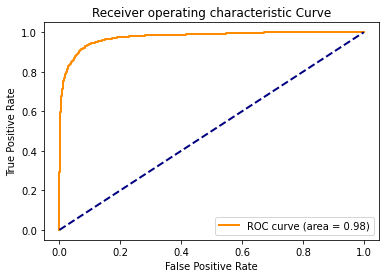

In [54]:
NeuralNetworks(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling,80)

C:\Users\vikash\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Classifaction Report Of Neural Network 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92    553574
           1       0.94      0.90      0.92    553574

    accuracy                           0.92   1107148
   macro avg       0.92      0.92      0.92   1107148
weighted avg       0.92      0.92      0.92   1107148



Accuracy score of the Neural Network model is =  0.9213646233385239


Confusion Matrix Of Neural Network Model


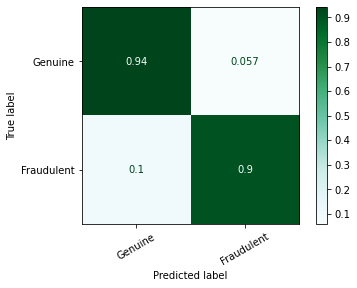

Sensitivity Of This Model Is :  0.9430428452203319
Specificity Of This Model Is : :  0.8996864014567159


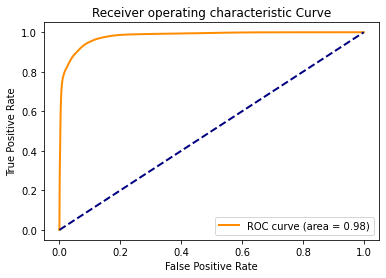

In [55]:
NeuralNetworks(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote,1)

In [56]:
'''NeuralNetworks(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalSmoteTomek,Y_Test_DataSmoteTomek)'''

'NeuralNetworks(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalSmoteTomek,Y_Test_DataSmoteTomek)'

# 7. AdaBoost Algorithm

In [57]:
def AdaBoostFunc(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    AdaBoostModel = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    AdaBoostModelTrain = AdaBoostModel.fit(TrainDataSet, Y_Train_Data)
    AdaBoostModelPrediction = AdaBoostModelTrain.predict(TestDataFinal)
    print("Accuracy:",accuracy_score(Y_Test_Data, AdaBoostModelPrediction))
    recall_acc = recall_score (Y_Test_Data,AdaBoostModelPrediction)
    print('Classifaction Report Of AdaBoost ')
    print(classification_report(Y_Test_Data, AdaBoostModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, AdaBoostModelPrediction))
    print('\n\nAccuracy score of the AdaBoost model is = ',accuracy_score(Y_Test_Data, AdaBoostModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, AdaBoostModelPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, AdaBoostModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, AdaBoostModelPrediction))
    print('\n\nConfusion Matrix Of AdaBoost Model')
    PlotConfusionMatrix(Y_Test_Data,AdaBoostModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, AdaBoostModelPrediction, average='macro'))

    ConfusionMatrix = confusion_matrix(Y_Test_Data,AdaBoostModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve
    ModelPrediction_Probability = AdaBoostModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   

Accuracy: 0.8981351981351982
Classifaction Report Of AdaBoost 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2145
           1       0.91      0.88      0.90      2145

    accuracy                           0.90      4290
   macro avg       0.90      0.90      0.90      4290
weighted avg       0.90      0.90      0.90      4290



Accuracy score of the AdaBoost model is =  0.8981351981351982


Confusion Matrix Of AdaBoost Model


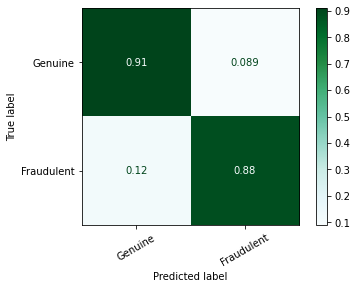

Sensitivity Of This Model Is :  0.9114219114219114
Specificity Of This Model Is : :  0.8848484848484849


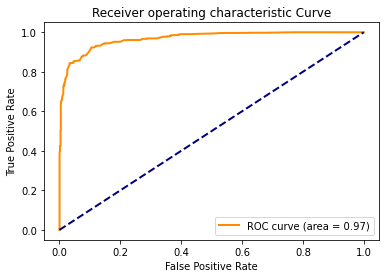

In [58]:
AdaBoostFunc(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

Accuracy: 0.9369515186768165
Classifaction Report Of AdaBoost 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    553574
           1       0.94      0.93      0.94    553574

    accuracy                           0.94   1107148
   macro avg       0.94      0.94      0.94   1107148
weighted avg       0.94      0.94      0.94   1107148



Accuracy score of the AdaBoost model is =  0.9369515186768165


Confusion Matrix Of AdaBoost Model


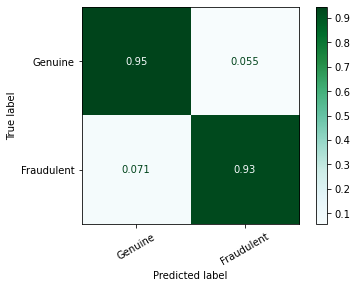

Sensitivity Of This Model Is :  0.9453406409983128
Specificity Of This Model Is : :  0.9285623963553201


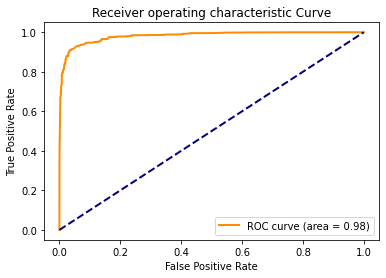

In [59]:
AdaBoostFunc(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

Accuracy: 0.9326953474298412
Classifaction Report Of AdaBoost 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    553565
           1       0.95      0.92      0.93    553565

    accuracy                           0.93   1107130
   macro avg       0.93      0.93      0.93   1107130
weighted avg       0.93      0.93      0.93   1107130



Accuracy score of the AdaBoost model is =  0.9326953474298412


Confusion Matrix Of AdaBoost Model


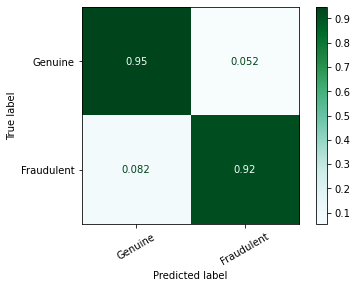

Sensitivity Of This Model Is :  0.9477748773856729
Specificity Of This Model Is : :  0.9176158174740093


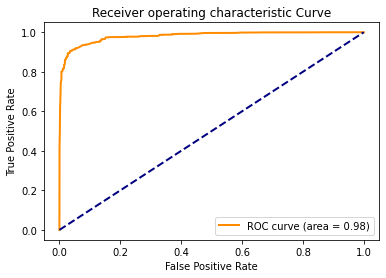

In [60]:
AdaBoostFunc(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# KMeans 

'def KMeansModelFunc(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):\n    KMeansModel = KMeans()  \n   # fit the model with the training data\n    KMeansModel.fit(TrainDataSet)\n    # Number of Clusters\n    print(\'\nDefault number of Clusters : \',KMeansModel.n_clusters)\n    # predict the clusters on the train dataset\n    predict_train = KMeansModel.predict(TrainDataSet)\n    print(\'\nCLusters on train data\',Y_Train_Data) \n    # predict the target on the test dataset\n    KMeansModelPredictions = KMeansModel.predict(TestDataFinal)\n    print(\'Clusters on test data\',KMeansModelPredictions) \n    \n    print("Accuracy:",accuracy_score(Y_Test_Data, KMeansModelPredictions))\n    recall_acc = recall_score (Y_Test_Data,KMeansModelPredictions)\n    print(\'Classifaction Report Of AdaBoost \')\n    print(classification_report(Y_Test_Data, KMeansModelPredictions))\n    ClassificationReport.append(classification_report(Y_Test_Data, KMeansModelPredictions))\n    print(\'\n\nAccurac

'KMeansModelFunc(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)'

# Gradient Boosting Algorithms

# 1 Gradient Boosting Classifier

In [63]:
def GradientBoostingFunc(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    GradientBoostingModel =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    GradientBoostingModel.fit(TrainDataSet,Y_Train_Data)
    GradientBoostingTest = GradientBoostingModel.predict(TestDataFinal)
        
    print("Accuracy:",accuracy_score(Y_Test_Data, GradientBoostingTest))
    recall_acc = recall_score (Y_Test_Data,GradientBoostingTest)
    print('Classifaction Report Of Gradient Boosting ')
    print(classification_report(Y_Test_Data, GradientBoostingTest))
    ClassificationReport.append(classification_report(Y_Test_Data, GradientBoostingTest))
    print('\n\nAccuracy score of the Gradient Boosting model is = ',accuracy_score(Y_Test_Data, GradientBoostingTest))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, GradientBoostingTest))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, GradientBoostingTest))
    F1ScoreList.append(f1_score(Y_Test_Data, GradientBoostingTest))
    print('\n\nConfusion Matrix Of Gradient Boosting Model')
    PlotConfusionMatrix(Y_Test_Data,GradientBoostingTest)
    RecallScoreList.append(recall_score(Y_Test_Data, GradientBoostingTest, average='macro'))

    ConfusionMatrix = confusion_matrix(Y_Test_Data,GradientBoostingTest, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve
    ModelPrediction_Probability = GradientBoostingModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   

Accuracy: 0.9223776223776223
Classifaction Report Of Gradient Boosting 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2145
           1       0.93      0.92      0.92      2145

    accuracy                           0.92      4290
   macro avg       0.92      0.92      0.92      4290
weighted avg       0.92      0.92      0.92      4290



Accuracy score of the Gradient Boosting model is =  0.9223776223776223


Confusion Matrix Of Gradient Boosting Model


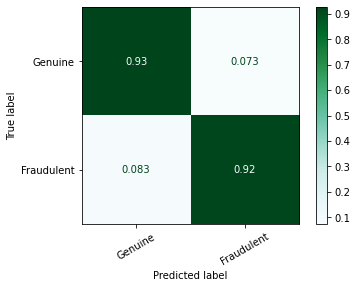

Sensitivity Of This Model Is :  0.9272727272727272
Specificity Of This Model Is : :  0.9174825174825175


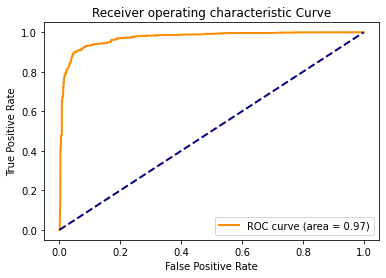

In [64]:
GradientBoostingFunc(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

Accuracy: 0.9437934223789413
Classifaction Report Of Gradient Boosting 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    553574
           1       0.96      0.93      0.94    553574

    accuracy                           0.94   1107148
   macro avg       0.94      0.94      0.94   1107148
weighted avg       0.94      0.94      0.94   1107148



Accuracy score of the Gradient Boosting model is =  0.9437934223789413


Confusion Matrix Of Gradient Boosting Model


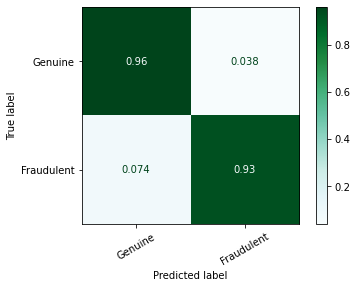

Sensitivity Of This Model Is :  0.9620556601285465
Specificity Of This Model Is : :  0.9255311846293359


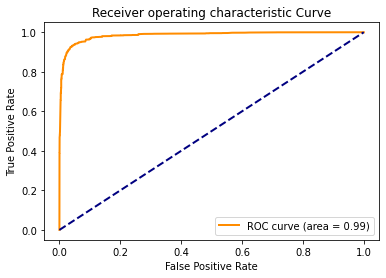

In [65]:
GradientBoostingFunc(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

Accuracy: 0.9436217968982865
Classifaction Report Of Gradient Boosting 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    553565
           1       0.96      0.93      0.94    553565

    accuracy                           0.94   1107130
   macro avg       0.94      0.94      0.94   1107130
weighted avg       0.94      0.94      0.94   1107130



Accuracy score of the Gradient Boosting model is =  0.9436217968982865


Confusion Matrix Of Gradient Boosting Model


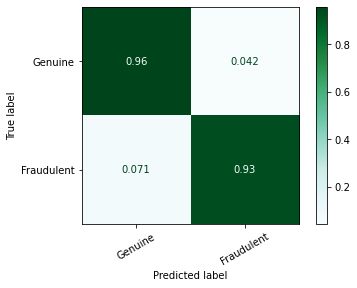

Sensitivity Of This Model Is :  0.9584475174550414
Specificity Of This Model Is : :  0.9287960763415317


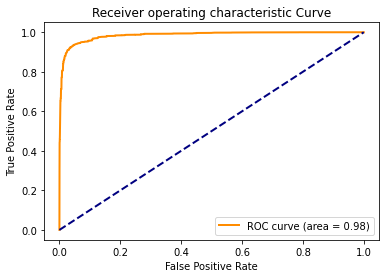

In [66]:
GradientBoostingFunc(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# XGBoost

In [67]:
def XGBoostFunc(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    XGBoostModel = XGBClassifier()

    # fit the model with the training data
    XGBoostModel.fit(TrainDataSet,Y_Train_Data)


   
    # predict the target on the test dataset
    XGBoostModelPrediction = XGBoostModel.predict(TestDataFinal)
    print('\nTarget on test data',XGBoostModelPrediction) 

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_Test_Data,XGBoostModelPrediction)
    print('\naccuracy_score on test dataset : ', accuracy_test)



    print('Classifaction Report Of XGBoost ')
    print(classification_report(Y_Test_Data, XGBoostModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, XGBoostModelPrediction))
    print('\n\nAccuracy score of the XGBoost model is = ',accuracy_score(Y_Test_Data, XGBoostModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, XGBoostModelPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, XGBoostModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, XGBoostModelPrediction))
    print('\n\nConfusion Matrix Of XGBoost Model')
    PlotConfusionMatrix(Y_Test_Data,XGBoostModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, XGBoostModelPrediction, average='macro'))

    ConfusionMatrix = confusion_matrix(Y_Test_Data,XGBoostModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve
    ModelPrediction_Probability = XGBoostModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   


Target on test data [0 0 0 ... 1 1 1]

accuracy_score on test dataset :  0.9466200466200466
Classifaction Report Of XGBoost 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2145
           1       0.96      0.93      0.95      2145

    accuracy                           0.95      4290
   macro avg       0.95      0.95      0.95      4290
weighted avg       0.95      0.95      0.95      4290



Accuracy score of the XGBoost model is =  0.9466200466200466


Confusion Matrix Of XGBoost Model


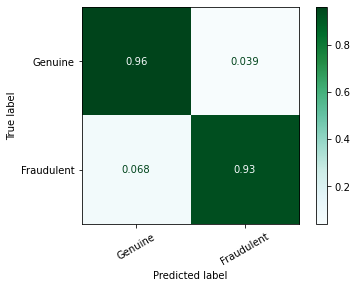

Sensitivity Of This Model Is :  0.9613053613053613
Specificity Of This Model Is : :  0.931934731934732


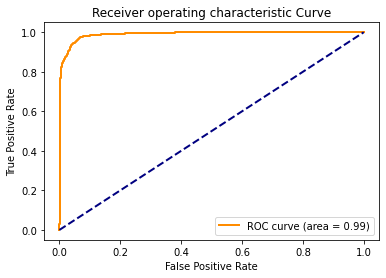

In [68]:
XGBoostFunc(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)


Target on test data [0 0 0 ... 1 1 1]

accuracy_score on test dataset :  0.9813683446115605
Classifaction Report Of XGBoost 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    553574
           1       0.99      0.97      0.98    553574

    accuracy                           0.98   1107148
   macro avg       0.98      0.98      0.98   1107148
weighted avg       0.98      0.98      0.98   1107148



Accuracy score of the XGBoost model is =  0.9813683446115605


Confusion Matrix Of XGBoost Model


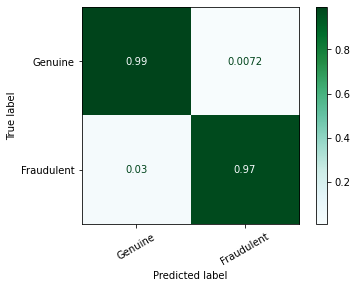

Sensitivity Of This Model Is :  0.9928410655124699
Specificity Of This Model Is : :  0.9698956237106512


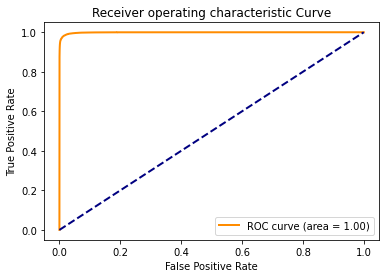

In [69]:
XGBoostFunc(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)


Target on test data [0 0 0 ... 1 1 1]

accuracy_score on test dataset :  0.9807411957042081
Classifaction Report Of XGBoost 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    553565
           1       0.99      0.97      0.98    553565

    accuracy                           0.98   1107130
   macro avg       0.98      0.98      0.98   1107130
weighted avg       0.98      0.98      0.98   1107130



Accuracy score of the XGBoost model is =  0.9807411957042081


Confusion Matrix Of XGBoost Model


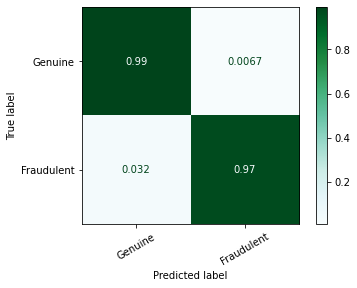

Sensitivity Of This Model Is :  0.9933178578848012
Specificity Of This Model Is : :  0.9681645335236151


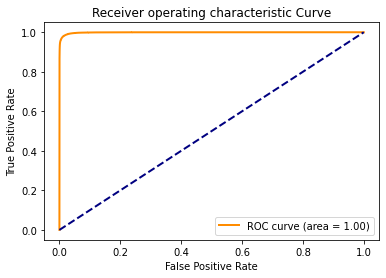

In [70]:
XGBoostFunc(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# NaiveBayes

In [71]:
def NaiveBayesFunc(TrainDataSet,Y_Train_Data,TestDataFinal,Y_Test_Data):
    NaiveBayesModel = GaussianNB()
    # fit the model with the training data
    NaiveBayesModel.fit(TrainDataSet,Y_Train_Data)
    # predict the target on the train dataset

    
    # predict the target on the test dataset
    NaiveBayesModelPrediction = NaiveBayesModel.predict(TestDataFinal)
    print('Target on test data',NaiveBayesModelPrediction) 
    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_Test_Data,NaiveBayesModelPrediction)
    print('accuracy_score on test dataset : ', accuracy_test)
    
    
    print('Classifaction Report Of NaiveBayes ')
    print(classification_report(Y_Test_Data, NaiveBayesModelPrediction))
    ClassificationReport.append(classification_report(Y_Test_Data, NaiveBayesModelPrediction))
    print('\n\nAccuracy score of the NaiveBayes model is = ',accuracy_score(Y_Test_Data, NaiveBayesModelPrediction))
    AccuracyScoreList.append(accuracy_score(Y_Test_Data, NaiveBayesModelPrediction))    
    PrecisionScoreList.append(precision_score(Y_Test_Data, NaiveBayesModelPrediction))
    F1ScoreList.append(f1_score(Y_Test_Data, NaiveBayesModelPrediction))
    print('\n\nConfusion Matrix Of NaiveBayes Model')
    PlotConfusionMatrix(Y_Test_Data,NaiveBayesModelPrediction)
    RecallScoreList.append(recall_score(Y_Test_Data, NaiveBayesModelPrediction, average='macro'))

    ConfusionMatrix = confusion_matrix(Y_Test_Data,NaiveBayesModelPrediction, normalize='true')
    Sensitivity = ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])
    print('Sensitivity Of This Model Is : ', Sensitivity )
    Specificity = ConfusionMatrix[1,1]/(ConfusionMatrix[1,0]+ConfusionMatrix[1,1])
    print('Specificity Of This Model Is : : ', Specificity)
   
    SenstivityList.append(Sensitivity)
    SpecificityList.append(Specificity)
    

    #ROC Curve
    ModelPrediction_Probability = NaiveBayesModel.predict_proba(TestDataFinal)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_Test_Data,  ModelPrediction_Probability)
    roc_auc = metrics.auc(fpr, tpr)
    PyPlot.figure()
    lw = 2
    PyPlot.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    PyPlot.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    PyPlot.xlabel("False Positive Rate")
    PyPlot.ylabel("True Positive Rate")
    PyPlot.title("Receiver operating characteristic Curve")
    PyPlot.legend(loc="lower right")
    PyPlot.show()   

Target on test data [0 0 0 ... 1 1 1]
accuracy_score on test dataset :  0.8149184149184149
Classifaction Report Of NaiveBayes 
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      2145
           1       0.91      0.70      0.79      2145

    accuracy                           0.81      4290
   macro avg       0.83      0.81      0.81      4290
weighted avg       0.83      0.81      0.81      4290



Accuracy score of the NaiveBayes model is =  0.8149184149184149


Confusion Matrix Of NaiveBayes Model


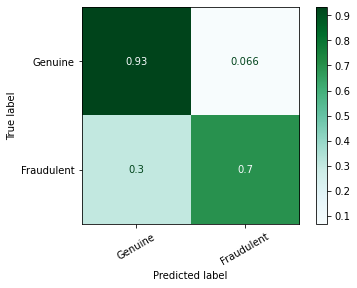

Sensitivity Of This Model Is :  0.9337995337995338
Specificity Of This Model Is : :  0.696037296037296


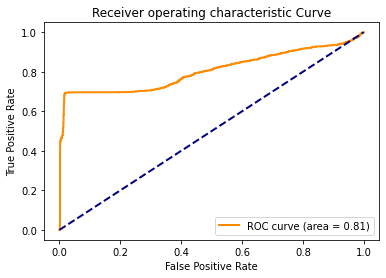

In [72]:
NaiveBayesFunc(TrainDataSetUnderSampling,Y_Train_DataUnderSampling,TestDataFinalUnderSampling,Y_Test_DataUnderSampling)

Target on test data [0 0 0 ... 0 1 1]
accuracy_score on test dataset :  0.77656374757485
Classifaction Report Of NaiveBayes 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79    553574
           1       0.83      0.69      0.76    553574

    accuracy                           0.78   1107148
   macro avg       0.78      0.78      0.77   1107148
weighted avg       0.78      0.78      0.77   1107148



Accuracy score of the NaiveBayes model is =  0.77656374757485


Confusion Matrix Of NaiveBayes Model


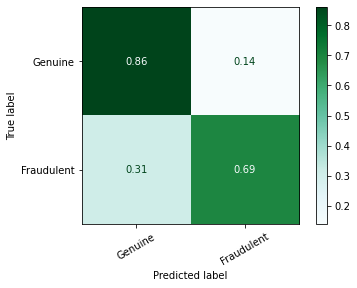

Sensitivity Of This Model Is :  0.8607846466777703
Specificity Of This Model Is : :  0.6923428484719297


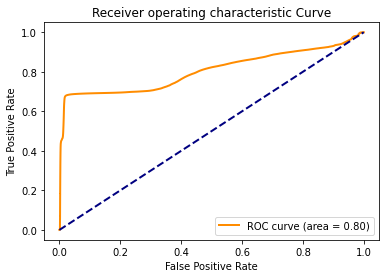

In [73]:
NaiveBayesFunc(TrainDataSetSmote,Y_Train_DataSmote,TestDataFinalSmote,Y_Test_DataSmote)

Target on test data [0 0 0 ... 1 1 1]
accuracy_score on test dataset :  0.7772041223704533
Classifaction Report Of NaiveBayes 
              precision    recall  f1-score   support

           0       0.74      0.86      0.79    553565
           1       0.83      0.69      0.76    553565

    accuracy                           0.78   1107130
   macro avg       0.79      0.78      0.78   1107130
weighted avg       0.79      0.78      0.78   1107130



Accuracy score of the NaiveBayes model is =  0.7772041223704533


Confusion Matrix Of NaiveBayes Model


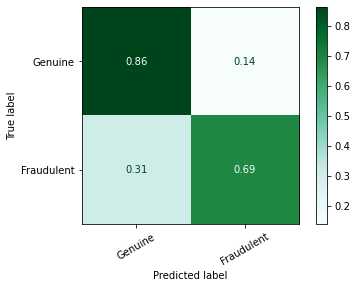

Sensitivity Of This Model Is :  0.8622076901538211
Specificity Of This Model Is : :  0.6922005545870855


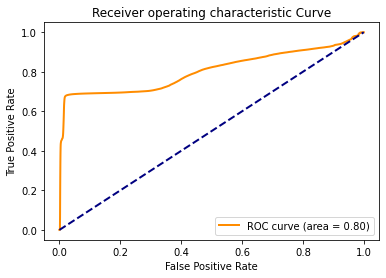

In [74]:
NaiveBayesFunc(TrainDataSetSmoteTomek,Y_Train_DataSmoteTomek,TestDataFinalTomek,Y_Test_DataSmoteTomek)

# Graph comparing all Models Accuracies

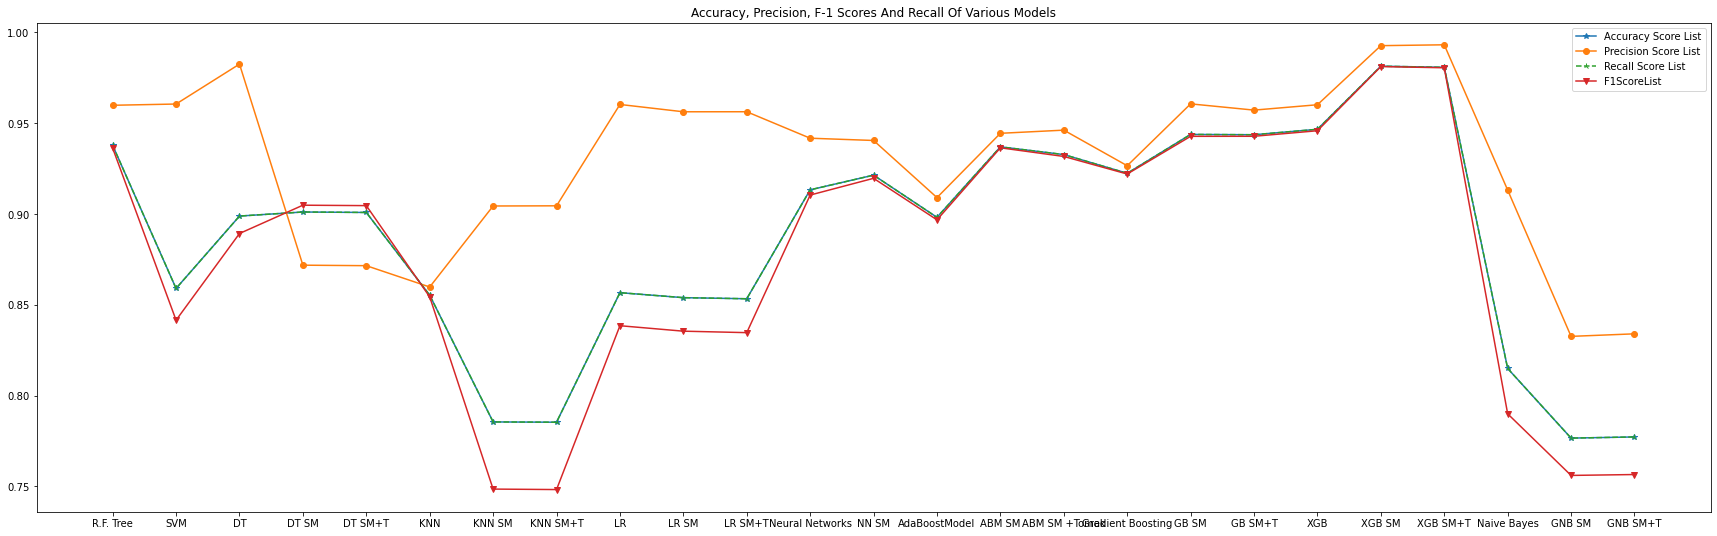

In [78]:
y = AccuracyScoreList
ModelName=['R.F. Tree','SVM','DT','DT SM','DT SM+T','KNN','KNN SM','KNN SM+T','LR','LR SM','LR SM+T','Neural Networks','NN SM','AdaBoostModel','ABM SM','ABM SM +Tomek', 'Gradient Boosting', 'GB SM', 'GB SM+T', 'XGB', 'XGB SM', 'XGB SM+T', 'Naive Bayes','GNB SM','GNB SM+T']


f = PyPlot.figure()
f.set_figwidth(30)
f.set_figheight(9)
PyPlot.plot( ModelName,AccuracyScoreList, marker="*",label ='Accuracy Score List')
PyPlot.plot( ModelName,PrecisionScoreList, marker="o",label ='Precision Score List')
PyPlot.plot( ModelName,RecallScoreList,linestyle='dashed', marker="2",label ='Recall Score List')
PyPlot.title('Accuracy, Precision, F-1 Scores And Recall Of Various Models')
PyPlot.plot( ModelName,F1ScoreList, marker="v",label ='F1ScoreList')
PyPlot.legend()
PyPlot.show()

# Exporting Files in csv format to open access them in front-end

In [76]:
'''Exporting Files in csv format to open access them in front-end'''
ModelName=['Random Forest Tree','SVM','DT','DT SMOTE','DT SMOTE+Tomek','KNN','KNN SMOTE','KNN SMOTE+TOMEK','LR','LR SMOTE','LR SMOTE+TOMEk','Neural Networks','NN SMOTE','AdaBoostModel','AdaBoostModel SMOTE','AdaBoostModel SMOTE +Tomek', 'Gradient Boosting', 'GB SMote', 'GB SMote+Tomek', 'XGB', 'XGB SMote', 'XGB SMote+Tomek', 'Naive Bayes','GNB SMote','GNB SMote+Tomek']

DataDictionary = {'Model Name': ModelName, 'Accuracy': AccuracyScoreList,'Precision Score':PrecisionScoreList ,'Recall Score':RecallScoreList, 'F1Score':F1ScoreList,'Sesnitivity':SenstivityList,'Specificity':SpecificityList}         
ExportDataFile = Pandas.DataFrame(DataDictionary)   
# saving the dataframe 
ExportDataFile.to_csv('DataSet/DataExportedNew.csv') 


# Opening Front-end Sites